# Лабораторна робота 5

# Метод ліктя. Кластеризація даних

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import silhouette_score, accuracy_score
from sklearn.cluster import KMeans

# Завдання 1

# Завантажити датасет Ірис. Роздрукувати перші 5 рядочків.

In [2]:
iris = datasets.load_iris()
data = iris.data
target = iris.target

#### Методом ліктя визначаємо оптимальну кількість кластерів.

In [3]:
print(pd.DataFrame(data, columns=iris.feature_names).head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


#### Масштабуємо дані

In [5]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(data)

#### Конвертація матриці в pd DataFrame

In [6]:
x_2dim = pd.DataFrame(x_scaled, columns=iris.feature_names).iloc[:, 1:]

#### Застосування ліктевого методу для визначення оптимальної кількості кластерів

In [7]:
wcss_2dim = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=100, n_init=10, random_state=0)
    kmeans.fit(x_2dim)
    wcss_2dim.append(kmeans.inertia_)

C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

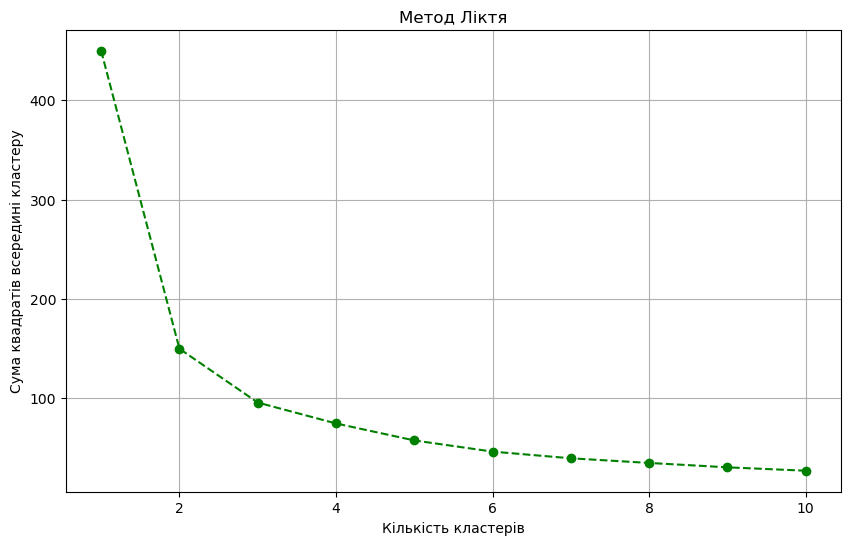

In [10]:
plt.figure(figsize=(10,6))
plt.plot(range(1, 11), wcss_2dim, marker='o', linestyle='--', color='green')
plt.title('Метод Ліктя')
plt.xlabel('Кількість кластерів')
plt.ylabel('Сума квадратів всередині кластеру')
plt.grid(True)
plt.show()

#### За методом ліктя оптимальна кількість кластерів в межах 2-ох

#### Визначення оптимальної кількості кластерів за методом Силуетів



In [12]:
silhouette_q = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    cluster_labels = kmeans.fit_predict(x_2dim)
    silhouette_avg = silhouette_score(x_2dim, cluster_labels)
    silhouette_q.append(silhouette_avg)

C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

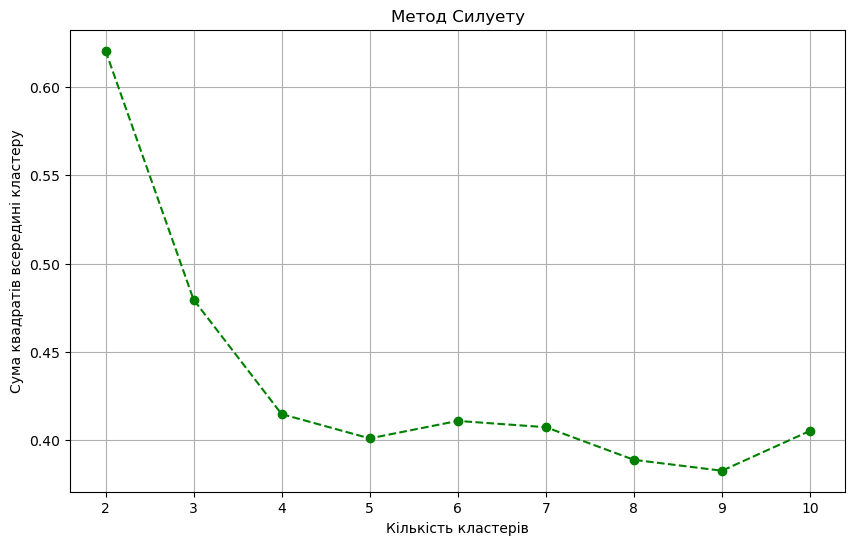

In [14]:
plt.figure(figsize=(10,6))
plt.plot(range(2, 11), silhouette_q, marker='o', linestyle='--', color='green')
plt.title('Метод Силуету')
plt.xlabel('Кількість кластерів')
plt.ylabel('Сума квадратів всередині кластеру')
plt.grid(True)
plt.show()

#### Максимальне значення на вісі x, x = 2

#### Візуалізація кластерів

In [15]:
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kmeans.fit_predict(x_scaled)

C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


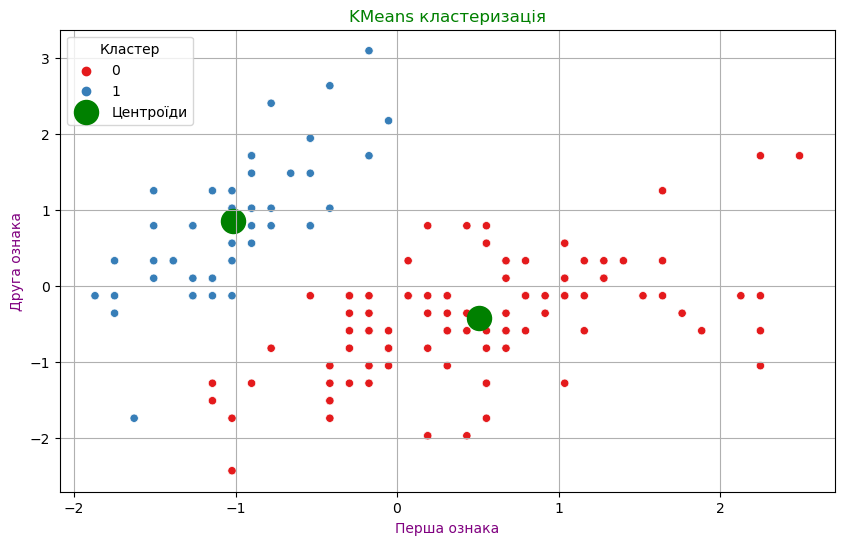

In [22]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=x_scaled[:, 0], y=x_scaled[:, 1], hue=clusters, palette='Set1', legend='full') 
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='green', label='Центроїди')
plt.title('KMeans кластеризація', color='green')  
plt.xlabel('Перша ознака', color='purple')
plt.ylabel('Друга ознака', color='purple')
plt.legend(title='Кластер', loc='upper left')
plt.grid(True)
plt.show()

# Висновки
## Визначено кількість кластерів за методом Ліктя та Силуету
## Обидва показують однакову ефективність

# Завдання 2

## Завантажити датасет Student_data.csv (датасет з Kaggle) і реалізувати попередній аналіз даних

## Роздрукувати перші 5 рядків

In [23]:
students = pd.read_csv('Student_performance_data_.csv')
students.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


### Вивести розмір датасету, типи

In [24]:
students.shape

(2392, 15)

In [25]:
students.dtypes

StudentID              int64
Age                    int64
Gender                 int64
Ethnicity              int64
ParentalEducation      int64
StudyTimeWeekly      float64
Absences               int64
Tutoring               int64
ParentalSupport        int64
Extracurricular        int64
Sports                 int64
Music                  int64
Volunteering           int64
GPA                  float64
GradeClass           float64
dtype: object

### Перевірити на пропущені значення

In [26]:
students.isnull().sum()


StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

#### Перевірити дублікати. Якщо є - видалити. Вивести описову статистику.

In [27]:
students.duplicated().sum()


0

In [28]:
students.describe()


,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


# Вирішуємо задачу класифікації

In [29]:
x = students.drop('GradeClass', axis=1)
y = students['GradeClass']

### Масштабуємо 

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [32]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

### Побудувати оцінки з 3 моделей на вибір. Підібрати оптимальні параметри.

## Random Forest

In [33]:
param_grid_rf = {
    'n_estimators':[100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(random_state=42)

grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=2)
grid_search_rf.fit(x_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [34]:
print('Найкращі параметри для Random Forest:', grid_search_rf.best_params_)
print('Best cross-validation accuracy for Random Forest:', grid_search_rf.best_score_)

Найкращі параметри для Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation accuracy for Random Forest: 0.9210640711932525


## Оцінюємо модель на тестовій вибірці

In [35]:
y_pred_rf = grid_search_rf.predict(x_test)
print('Test accuracy for Random Forest:', accuracy_score(y_test, y_pred_rf))

Test accuracy for Random Forest: 0.9123173277661796


# Support Vector Machine

In [36]:
param_grid_svc = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': [0.1, 1, 'scale', 'auto']
}

In [37]:
grid_search = GridSearchCV(
    estimator=SVC(),
    param_grid=param_grid_svc,
    cv=5,  
    n_jobs=-1,
    verbose=2
)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [0.1, 1, 'scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']},
             verbose=2)

In [38]:
print('Найкращі параметри Support Vector Machine:', grid_search.best_params_)
print('Best cross-validation accuracy for Support Vector Machine:', grid_search.best_score_)

Найкращі параметри Support Vector Machine: {'C': 10, 'gamma': 0.1, 'kernel': 'linear'}
Best cross-validation accuracy for Support Vector Machine: 0.8557147348707502


## Оцінюємо модель на тестовій вибірці

In [40]:
y_pred_svc = grid_search.predict(x_test)
print('Test accuracy for Support Vector Machine:', accuracy_score(y_test, y_pred_svc))

Test accuracy for Support Vector Machine: 0.824634655532359


## K-Neighbors

In [41]:
param_grid_kn = {
    'n_neighbors': range(1, 18, 2),
    'weights': ['uniform', 'distance'],
    'metric': ['minkowski', 'euclidean', 'manhattan']
}

In [42]:
knn = KNeighborsClassifier()
grid_search_kn = GridSearchCV(
    estimator=knn,
    param_grid=param_grid_kn,
    cv=5,  
    n_jobs=-1, 
    verbose=2
)
grid_search_kn.fit(x_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': range(1, 18, 2),
                         'weights': ['uniform', 'distance']},
             verbose=2)

In [44]:
print('Найкращі параметри для K-Neighbors:', grid_search_kn.best_params_)
print('Best cross-validation accuracy for K-Neighbors:', grid_search_kn.best_score_)

Найкращі параметри для K-Neighbors: {'metric': 'manhattan', 'n_neighbors': 13, 'weights': 'uniform'}
Best cross-validation accuracy for K-Neighbors: 0.7354749634328053


In [45]:
y_pred_kn = grid_search_kn.predict(x_test)
print('Test accuracy for K-Neighbors:', accuracy_score(y_test, y_pred_kn))

Test accuracy for K-Neighbors: 0.7098121085594989


## Визначаємо оптимальну кількість кластерів методом Ліктя

### Видалення стовпця з ID студентів

In [46]:
x_2dim = students.loc[:, students.columns != 'StudentID']
wcss_2dim = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=100, n_init=10, random_state=0)
    kmeans.fit(x_2dim)
    wcss_2dim.append(kmeans.inertia_)

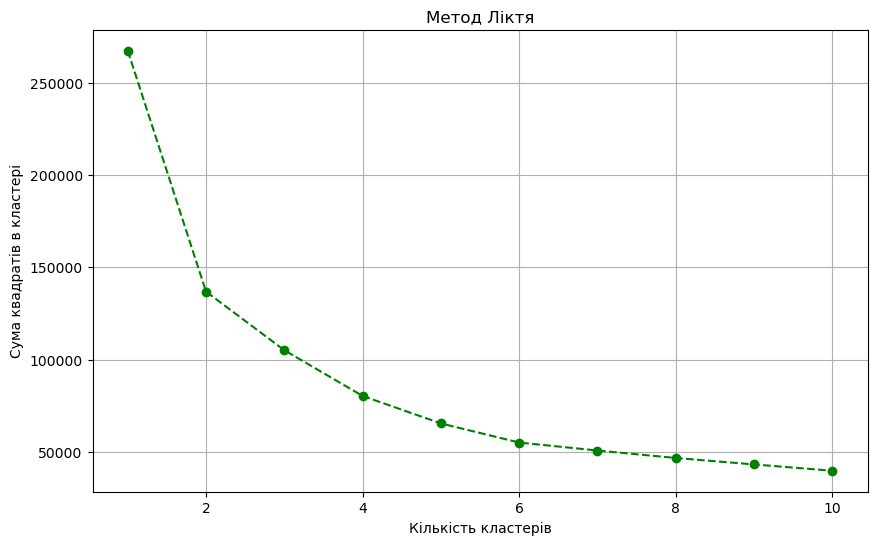

In [50]:
plt.figure(figsize=(10,6))
plt.plot(range(1, 11), wcss_2dim, marker='o', linestyle='--', color='green')
plt.title('Метод Ліктя')
plt.xlabel('Кількість кластерів')
plt.ylabel('Сума квадратів в кластері')
plt.grid(True)
plt.show()

### Оптимальна кількість кластерів x=2

## Метод Силуетів 

In [51]:
silhouette_q = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    cluster_labels = kmeans.fit_predict(x_2dim)
    silhouette_avg = silhouette_score(x_2dim, cluster_labels)
    silhouette_q.append(silhouette_avg)

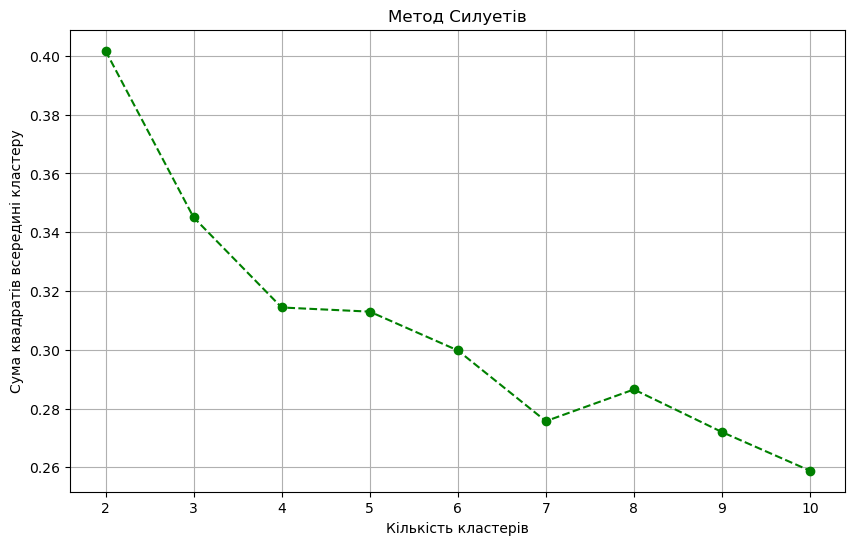

In [52]:
plt.figure(figsize=(10,6))
plt.plot(range(2, 11), silhouette_q, marker='o', linestyle='--', color='green')
plt.title('Метод Силуетів')
plt.xlabel('Кількість кластерів')
plt.ylabel('Сума квадратів всередині кластеру')
plt.grid(True)
plt.show()

### Найоптимальніша точка x = 2

### Візуалізуємо кластери

In [53]:
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kmeans.fit_predict(x_train)

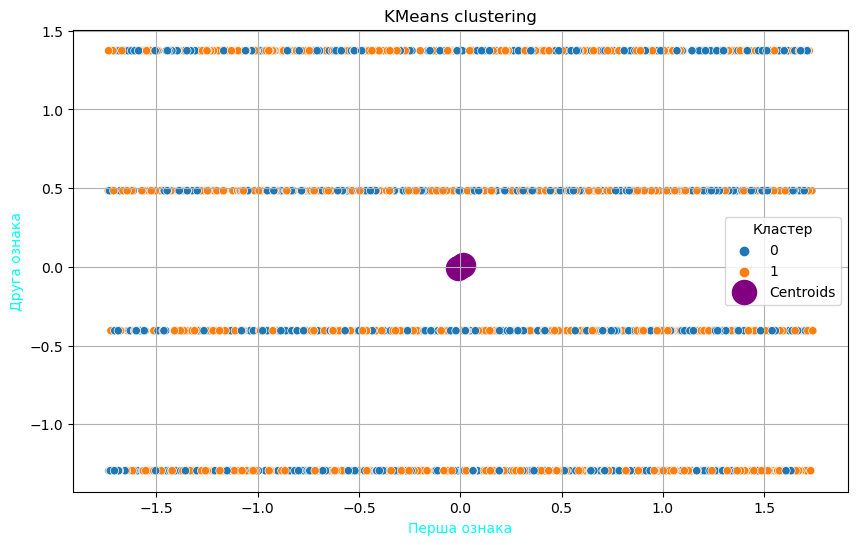

In [62]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=x_train[:, 0], y=x_train[:, 1], hue=clusters, palette='tab10', legend='full')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='purple', label='Centroids')
plt.title('KMeans clustering')
plt.xlabel('Перша ознака', color='cyan')
plt.ylabel('Друга ознака', color='cyan')
plt.legend(title='Кластер')
plt.grid(True)
plt.show()

# Висновки
### Проаналізовано датасет Students
### Із трьох моделей найвищу точність показує Random Forest
### Визначена оптимальна кількість кластерів за методами Ліктя та Силуету, що становить 2 кластери